In [24]:
from classy import Class
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [89]:
QCDM.struct_cleanup()
QCDM.empty()

In [90]:
params={'T_cmb':2.7255, 'H0':68,
        'Omega_b':0.053,'Omega_cdm':0.296, 'Omega_k':0.0, 'Omega_Lambda':0.0, 'Omega_fld':0.0,
       'Omega_scf': -1, 'attractor_ic_scf':'no', 'scf_parameters':'8,2,0.01,33.9627,1.0,17.3,10**11' , 
        'scf_tuning_index':4, 'a_ini_over_a_today_default' : 10**-19,'output':'lCl, tCl','lensing':'yes'}
#params={'Omega_Lambda':0.0, 'Omega_fld':0.0,
#       'Omega_scf': -1, 'attractor_ic_scf':'no', 'scf_parameters':'8,2,0.01,34.8,2.95,0' , 'scf_tuning_index':2}
#params2={'T_cmb':2.7255, 'H0':68,
#        'Omega_b':0.053,'Omega_cdm':0.296, 'Omega_k':0.0, 'Omega_Lambda':0.0, 'Omega_fld':0.0,
#       'Omega_scf': -1, 'attractor_ic_scf':'no', 'scf_parameters':'8,2,0.01,33.9627,1.0,17.3,10**11' , 
#        'scf_tuning_index':2, 'a_ini_over_a_today_default' : 10**-20,'output':'lCl, tCl','lensing':'yes'}

In [91]:
QCDM = Class()
QCDM.set(params)
QCDM.compute()

In [92]:

lensed_cl = QCDM.lensed_cl(10**3)
bgQCDM = QCDM.get_background()
print(bgQCDM.keys())
print(lensed_cl.keys())
#.keys() in py3 and .viewkeys() in py2

zlist = bgQCDM['z']
alist = 1/(zlist + 1)
#zlist2 = bgqcdm2['z']
#alist2 = 1/(zlist2 + 1)

dict_keys(['z', 'proper time [Gyr]', 'conf. time [Mpc]', 'H [1/Mpc]', 'comov. dist.', 'ang.diam.dist.', 'lum. dist.', 'comov.snd.hrz.', '(.)rho_g', '(.)rho_b', '(.)rho_cdm', '(.)rho_ur', '(.)rho_crit', '(.)rho_scf', '(.)p_scf', '(.)p_prime_scf', 'phi_scf', "phi'_scf", 'V_scf', "V'_scf", "V''_scf", '(.)rho_tot', '(.)p_tot', '(.)p_tot_prime', 'gr.fac. D', 'gr.fac. f'])
dict_keys(['tt', 'pp', 'tp', 'ell'])


Text(0, 0.5, '$\\phi$')

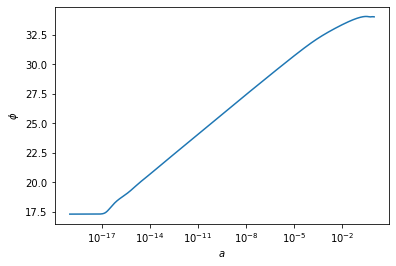

In [93]:
plt.semilogx(alist, bgQCDM["phi_scf"])
plt.xlabel(r"$a$")
plt.ylabel(r"$\phi$")
#plot with solution to pure exponential potential.... given in Agrawal Rock'n'Roll

Text(0, 0.5, '$\\rho_n$')

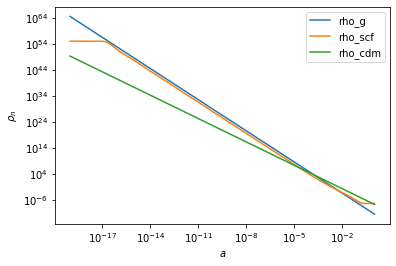

In [26]:
#%matplotlib widget #use this for interactive plot
plt.loglog(alist, bgQCDM['(.)rho_g'], alist,bgQCDM['(.)rho_scf'],alist,bgQCDM['(.)rho_cdm'])
plt.legend(['rho_g', 'rho_scf', 'rho_cdm'])
plt.xlabel(r"$a$")
plt.ylabel(r"$\rho_n$")

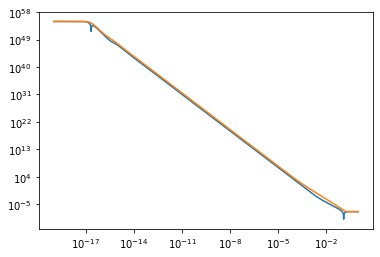

In [63]:
%matplotlib inline
plt.loglog(alist, np.abs(bgQCDM['(.)p_scf']), alist, bgQCDM['(.)rho_scf'])

In [57]:
NN =5650
print("a || rho_photons/rho_scf || w_scf")
print(alist[NN],(bgQCDM['(.)rho_g']/bgQCDM['(.)rho_scf'])[NN], bgQCDM['(.)p_scf'][NN]/bgQCDM['(.)rho_scf'][NN])

a || rho_photons/rho_scf || w_scf
0.013167727067250048 0.44373291077570465 0.08581390607529223


In [12]:
val = 600
print(alist[val],bgQCDM['V_scf'][val],bgQCDM['phi_scf'][val],bgQCDM["phi'_scf"][val])

(6.571769646802019e-33, 3.155784259475351e+55, 17.3, 0.002315449618340519)


Text(0, 0.5, '$w_\\phi$')

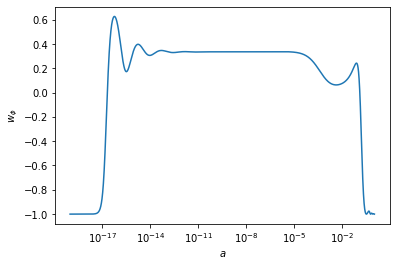

In [64]:
plt.semilogx(alist, (bgQCDM['(.)p_scf']/bgQCDM['(.)rho_scf']))
plt.xlabel(r"$a$")
plt.ylabel(r"$w_\phi$")

30.693588893455672
2.5941044030971467e+55
8.64701467699049e+54
0.12129915496489233


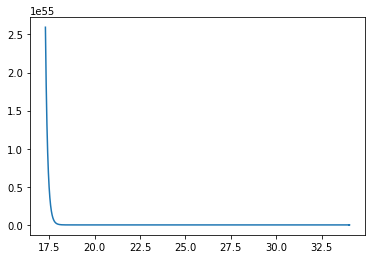

In [74]:
%matplotlib inline
plt.plot(bgQCDM['phi_scf'],bgQCDM["V_scf"])
print(bgQCDM['phi_scf'][4619])
print(bgQCDM['V_scf'][0])
print(bgQCDM['(.)rho_scf'][0])
print(bgQCDM["phi'_scf"][4600])

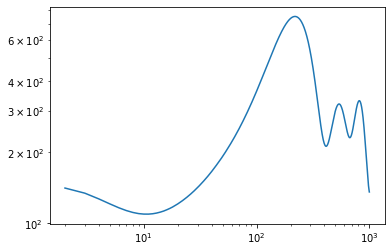

In [75]:
%matplotlib inline
l = np.array(range(2,10**3 + 1))
factor = l*(l+1)/(2*np.pi)
plt.loglog(l,factor*10**(12)*lensed_cl['tt'][2:])
#plt.loglog(l,factor*10**(12)*lensed_cl['tt'][2:],l,factor*10**(12)*lensed_cl2['tt'][2:])

In [82]:
np.shape(lensed_cl['tt'])

(1001,)